# [Goulib](../notebook.ipynb).table
"mini pandas.DataFrame" Table class with Excel + CSV I/O, easy access to columns, HTML output, and much more.

In [1]:
from Goulib.notebook import *
from Goulib.table import *

In [2]:
t=Table('../tests/data/test.xls') # read Excel files thanks to xlrd (http://www.python-excel.org/)
h(t.titles) #column headers can be used as indexes
h(t[:3]) # since a Table is a list of rows, rows can be accessed by indexing. 
h(t.rowasdict(1)) #a row can be extracted as a dict where column titles are keys

In [3]:
# handle the mess in Excel Cell types ...
t.to_date('OrderDate',fmt=['%m/%d/%Y','Excel']) #converts column to date using several possible formats...
t.applyf('Cost',float) # apply a function to a column. Here force the column to contain floats
t.applyf('Total',lambda x:float(x) if isinstance(x,(int,float)) else float(x.replace(',','')))

True

In [4]:
from Goulib import itertools2, stats
t[10:]=[] #keep only the 10 first lines to save space below
t.sort('Total',reverse=True) # Tables can be sorted like lists
t.total([max,itertools2.count_unique,itertools2.count_unique,itertools2.count_unique,sum,stats.mean,sum])
t.footer #contains the result of the last call to total 

[datetime.date(2012, 9, 2), 3, 7, 3, 581, 7.290000000000001, 3576.19]

In [5]:
t # HTML representation in Notebook. Note the title/header and total/footer rows and cell alignment

OrderDate,Région,Rep,Item,Unités,Cost,Total
2012-01-23,Central,Kivell,Binder,50,19.99,999.50
2012-02-26,Central,Gill,Pen,27,19.99,539.73
2012-08-06,East,Jones,Binder,60,8.99,539.40
2012-05-05,Central,Jardine,Pencil,90,4.99,449.10
2012-01-04,East,Jones,Binder,60,4.99,299.40
2012-06-01,East,Jones,Pencil,95,1.99,189.05
2012-09-02,Central,Jardine,Pencil,36,4.99,179.64
2012-03-15,West,Sorvino,Pencil,56,2.99,167.44
2012-04-18,Central,Andrews,Pencil,75,1.99,149.25
2012-05-22,West,Thompson,Pencil,32,1.99,63.68


In [6]:
region=t.groupby(u'Région') # dictionary of subtables grouped by a column. notice Unicode support
region['East'] # isn't it nice ?

OrderDate,Rep,Item,Unités,Cost,Total
2012-08-06,Jones,Binder,60,8.99,539.40
2012-01-04,Jones,Binder,60,4.99,299.40
2012-06-01,Jones,Pencil,95,1.99,189.05


In [7]:
small=Table([[1,2],[3,4]])
small

1,2
3,4


C:\Anaconda\lib\site-packages\skimage\io\_io.py:132: UserWarning: <_io.BytesIO object at 0x000000000A04CB48> is a low contrast image
  warn('%s is a low contrast image' % fname)


Table(len=2,titles=['complex', 'content'],data=[[Table(len=2,titles=[],data=[[1, 2], [3, 4]]), '$$\\LaTeX : e=m.c^2$$'], [<Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>]])
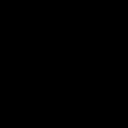
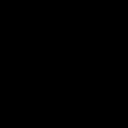

In [8]:
#cells can contain other tables, LaTeX expressions, Images... and more (soon...)
from Goulib.image import Image
lena=Image('../tests/data/lena.png').resize((128,128))
Table([[small,'$$\\LaTeX : e=m.c^2$$'],[lena,lena]],titles=['complex','content'])

In [9]:
from Goulib.math2 import *
from Goulib.itertools2 import *
res=Table(t) #copy
s=len(res)
for i in range(s-1):
    line=res[i]
    d=[hamming(line,res[j]) for j in range(i+1,s)]
    j=index_min(d)[0]+i
    res[i+1],res[j]=res[j],res[i+1] #swap
res

OrderDate,Région,Rep,Item,Unités,Cost,Total
2012-02-26,Central,Gill,Pen,27,19.99,539.73
2012-05-05,Central,Jardine,Pencil,90,4.99,449.10
2012-09-02,Central,Jardine,Pencil,36,4.99,179.64
2012-04-18,Central,Andrews,Pencil,75,1.99,149.25
2012-08-06,East,Jones,Binder,60,8.99,539.40
2012-01-04,East,Jones,Binder,60,4.99,299.40
2012-06-01,East,Jones,Pencil,95,1.99,189.05
2012-03-15,West,Sorvino,Pencil,56,2.99,167.44
2012-05-22,West,Thompson,Pencil,32,1.99,63.68
2012-01-23,Central,Kivell,Binder,50,19.99,999.50


In [10]:
hamming(t[1],t[2])

6